# Random Forest

In [17]:
import pandas as pd

# Load dataset (skip metadata row)
df = pd.read_csv(
    "Example_WearableComputing_weight_lifting_exercises_biceps_curl_variations.csv",
    skiprows=1,
    na_values=["NaN", "NA", ""]
)

# Optional: Drop sparse columns (>95% missing) and fill NaNs
missing_percentage = df.isnull().mean() * 100
sparse_cols = missing_percentage[missing_percentage > 95].index
df.drop(columns=sparse_cols, inplace=True)
df.fillna(df.median(numeric_only=True), inplace=True)

print("Final shape:", df.shape)
print("Remaining missing values:", df.isnull().sum().sum())

Final shape: (4024, 59)
Remaining missing values: 0


In [18]:
# Clean column names
df.columns = df.columns.str.strip()

# Drop columns with >95% missing values
df = df.dropna(axis=1, thresh=len(df)*0.05)

# Encode 'new_window' if it exists and is categorical
from sklearn.preprocessing import LabelEncoder
if 'new_window' in df.columns and df['new_window'].dtype == 'object':
    df['new_window'] = LabelEncoder().fit_transform(df['new_window'])

# Separate features and target, dropping ID/timestam
drop_cols = ['classe','user_name','raw_timestamp_part_1','raw_timestamp_part_2','cvtd_timestamp','num_window']
X = df.drop(columns=[c for c in drop_cols if c in df.columns])
y = df['classe']


Random Forest Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           A       1.00      1.00      1.00       273
           B       1.00      1.00      1.00       180
           C       1.00      1.00      1.00        23
           D       1.00      1.00      1.00        55
           E       1.00      1.00      1.00       274

    accuracy                           1.00       805
   macro avg       1.00      1.00      1.00       805
weighted avg       1.00      1.00      1.00       805



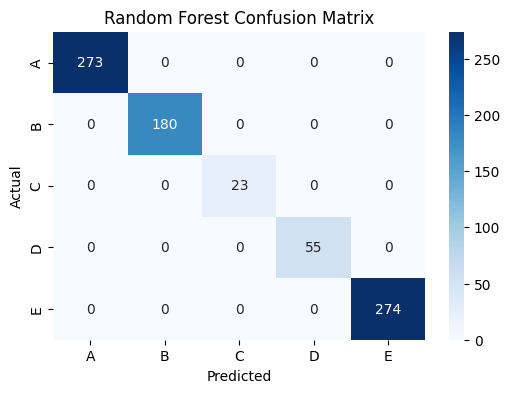

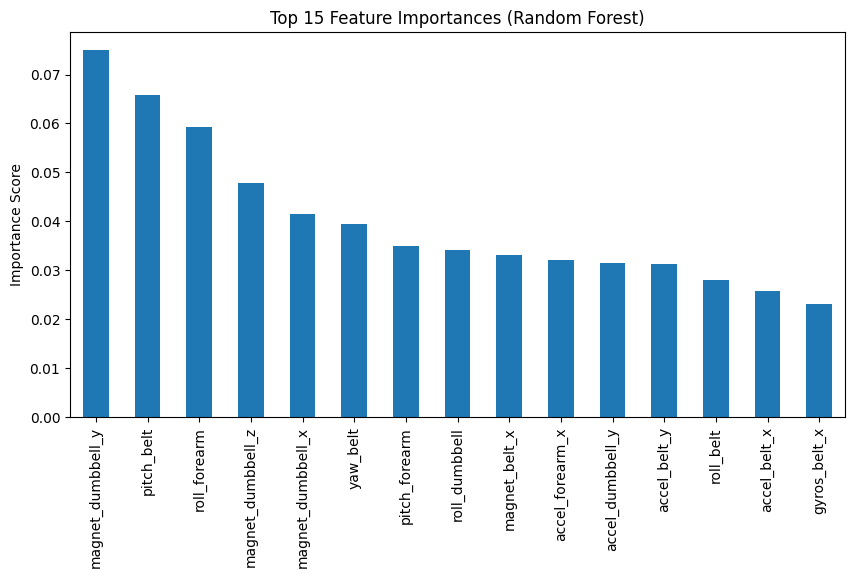

In [19]:

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Random Forest Model
rf = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# Evaluation
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix Heatmap
plt.figure(figsize=(6,4))
cm = confusion_matrix(y_test, y_pred, labels=rf.classes_)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=rf.classes_, yticklabels=rf.classes_)
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Feature Importance Visualization
importances = pd.Series(rf.feature_importances_, index=X.columns)
top_features = importances.sort_values(ascending=False).head(15)

plt.figure(figsize=(10,5))
top_features.plot(kind='bar')
plt.title("Top 15 Feature Importances (Random Forest)")
plt.ylabel("Importance Score")
plt.show()



# k-fold Cross Validation

In [20]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(rf, X, y, cv=5, n_jobs=-1)
print("Cross-validation accuracies:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross-validation accuracies: [0.7863354  0.96024845 0.97267081 0.97267081 0.77860697]
Mean CV Accuracy: 0.8941064862025276


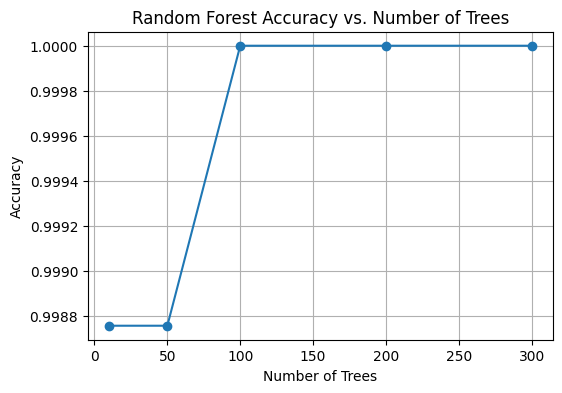

In [21]:
import numpy as np

trees = [10, 50, 100, 200, 300]
accuracies = []

for n in trees:
    model = RandomForestClassifier(n_estimators=n, random_state=42, n_jobs=-1)
    model.fit(X_train, y_train)
    acc = model.score(X_test, y_test)
    accuracies.append(acc)

plt.figure(figsize=(6,4))
plt.plot(trees, accuracies, marker='o')
plt.title("Random Forest Accuracy vs. Number of Trees")
plt.xlabel("Number of Trees")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()



# Cumulative Feature Importance Plot

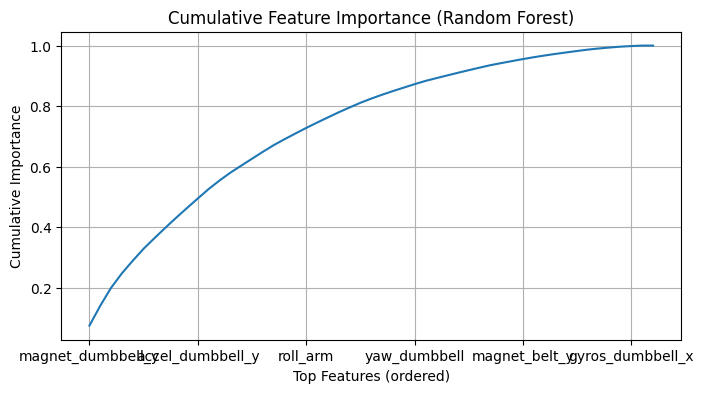

In [22]:
sorted_importances = importances.sort_values(ascending=False)
cumulative_importance = sorted_importances.cumsum()

plt.figure(figsize=(8,4))
cumulative_importance.plot()
plt.title("Cumulative Feature Importance (Random Forest)")
plt.xlabel("Top Features (ordered)")
plt.ylabel("Cumulative Importance")
plt.grid(True)
plt.show()
